<a href="https://colab.research.google.com/github/Oreki820/Projetos-EBAC/blob/main/Profissao_Cientista_de_Dados_M37_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Previs√£o de Inten√ß√£o de Compra de Clientes em Loja Web**

**Descri√ß√£o do Projeto**

Neste projeto, nosso objetivo √© criar um sistema inteligente para antecipar a inten√ß√£o de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes t√™m maior probabilidade de realizar compras online, com base em suas caracter√≠sticas e comportamentos passados. Essa capacidade de prever a inten√ß√£o de compra n√£o s√≥ aprimorar√° a experi√™ncia do cliente, mas tamb√©m permitir√° que a empresa direcione seus esfor√ßos de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padr√µes de comportamento dos clientes e identificar sinais que indicam a propens√£o deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que cont√©m informa√ß√µes detalhadas sobre os clientes, incluindo:

Dados demogr√°ficos (idade, renda, etc.)

Informa√ß√µes sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: N√≠vel de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da fam√≠lia do cliente.

Kidhome: N√∫mero de crian√ßas na casa do cliente.

Recency: N√∫mero de dias desde a √∫ltima compra do cliente.

Complain: 1 se o cliente reclamou nos √∫ltimos 2 anos, 0 caso contr√°rio.

MntWines: Valor gasto em vinhos nos √∫ltimos 2 anos.

MntFruits: Valor gasto em frutas nos √∫ltimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos √∫ltimos 2 anos.

MntFishProducts: Valor gasto em peixes nos √∫ltimos 2 anos.

MntSweetProducts: Valor gasto em doces nos √∫ltimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos √∫ltimos 2 anos.

NumDealsPurchases: N√∫mero de compras feitas com desconto

NumStorePurchases: N√∫mero de compras feitas diretamente nas lojas.

NumWebVisitsMonth: N√∫mero de visitas ao site da empresa no √∫ltimo m√™s.






**WebPurchases: N√∫mero de compras feitas pelo site da empresa.**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# ETAPA 1:

**Prepara√ß√£o dos Dados**

**Explora√ß√£o e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**An√°lise:** Construa uma storytelling com gr√°ficos, analisando e retirando insights das informa√ß√µes.

In [54]:
base = pd.read_csv('/content/marketing_campaign.csv', delimiter=';')

print("Formato da base:", base.shape)
display(base.head(3))

Formato da base: (2240, 16)


Year_Birth   Education Marital_Status   Income  Kidhome  Recency  MntWines  \
0        1957  Graduation         Single  58138.0        0       58       635   
1        1954  Graduation         Single  46344.0        1       38        11   
2        1965  Graduation       Together  71613.0        0       26       426   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   

   MntGoldProds  NumStorePurchases  NumWebVisitsMonth  Complain  WebPurchases  
0            88                  4                  7         0             1  
1             6                  2                  5         0             0  
2            42                 10                  4         0             1

In [55]:
display(base.info())
display(base.describe(include='all').T)

# % de nulos
nulls = base.isna().mean().sort_values(ascending=False)
print("Percentual de nulos por coluna:")
display((nulls*100).round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

None

count unique         top  freq          mean  \
Year_Birth         2240.0    NaN         NaN   NaN   1968.805804   
Education            2240      5  Graduation  1127           NaN   
Marital_Status       2240      8     Married   864           NaN   
Income             2216.0    NaN         NaN   NaN  52247.251354   
Kidhome            2240.0    NaN         NaN   NaN      0.444196   
Recency            2240.0    NaN         NaN   NaN     49.109375   
MntWines           2240.0    NaN         NaN   NaN    303.935714   
MntFruits          2240.0    NaN         NaN   NaN     26.302232   
MntMeatProducts    2240.0    NaN         NaN   NaN        166.95   
MntFishProducts    2240.0    NaN         NaN   NaN     37.525446   
MntSweetProducts   2240.0    NaN         NaN   NaN     27.062946   
MntGoldProds       2240.0    NaN         NaN   NaN     44.021875   
NumStorePurchases  2240.0    NaN         NaN   NaN      5.790179   
NumWebVisitsMonth  2240.0    NaN         NaN   NaN      5.316518   
Complain           2240.0    NaN         NaN   NaN      0.009375   
WebPurchases       2240.0    NaN         NaN   NaN      0.503571   

                            std     min      25%      50%      75%       max  
Year_Birth            11.984069  1893.0   1959.0   1970.0   1977.0    1996.0  
Education                   NaN     NaN      NaN      NaN      NaN       NaN  
Marital_Status              NaN     NaN      NaN      NaN      NaN       NaN  
Income             25173.076661  1730.0  35303.0  51381.5  68522.0  666666.0  
Kidhome                0.538398     0.0      0.0      0.0      1.0       2.0  
Recency               28.962453     0.0     24.0     49.0     74.0      99.0  
MntWines             336.597393     0.0    23.75    173.5   504.25    1493.0  
MntFruits             39.773434     0.0      1.0      8.0     33.0     199.0  
MntMeatProducts      225.715373     0.0     16.0     67.0    232.0    1725.0  
MntFishProducts       54.628979     0.0      3.0     12.0     50.0     259.0  
MntSweetProducts      41.280498     0.0      1.0      8.0     33.0     263.0  
MntGoldProds          52.167439     0.0      9.0     24.0     56.0     362.0  
NumStorePurchases      3.250958     0.0      3.0      5.0      8.0      13.0  
NumWebVisitsMonth      2.426645     0.0      3.0      6.0      7.0      20.0  
Complain               0.096391     0.0      0.0      0.0      0.0       1.0  
WebPurchases           0.500099     0.0      0.0      1.0      1.0       1.0

Percentual de nulos por coluna:


Income               1.07
Year_Birth           0.00
Education            0.00
Marital_Status       0.00
Kidhome              0.00
Recency              0.00
MntWines             0.00
MntFruits            0.00
MntMeatProducts      0.00
MntFishProducts      0.00
MntSweetProducts     0.00
MntGoldProds         0.00
NumStorePurchases    0.00
NumWebVisitsMonth    0.00
Complain             0.00
WebPurchases         0.00
dtype: float64

In [56]:
ANO_ATUAL = 2025
base["Age"] = ANO_ATUAL - base["Year_Birth"]

# Gasto total (soma das cestas de produtos)
gasto_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
base["MntTotal"] = base[gasto_cols].sum(axis=1)

# Compras totais (aproxima√ß√£o simples)
compras_cols = ["NumDealsPurchases","NumStorePurchases","WebPurchases"]
presentes = [c for c in compras_cols if c in base.columns]
base["ComprasTotal"] = base[presentes].sum(axis=1)

# Alvo bin√°rio: inten√ß√£o de compra no site
base["IntencaoWeb"] = (base["WebPurchases"] > 0).astype(int)

print("Vis√£o geral de novas colunas:")
display(base[["Age","MntTotal","ComprasTotal","NumWebVisitsMonth","WebPurchases","IntencaoWeb"]].describe())
print("Taxa de positivos (IntencaoWeb=1):", base["IntencaoWeb"].mean().round(3))

Vis√£o geral de novas colunas:


Age     MntTotal  ComprasTotal  NumWebVisitsMonth  \
count  2240.000000  2240.000000   2240.000000        2240.000000   
mean     56.194196   605.798214      6.293750           5.316518   
std      11.984069   602.249288      3.549101           2.426645   
min      29.000000     5.000000      0.000000           0.000000   
25%      48.000000    68.750000      3.000000           3.000000   
50%      55.000000   396.000000      6.000000           6.000000   
75%      66.000000  1045.500000      9.000000           7.000000   
max     132.000000  2525.000000     14.000000          20.000000   

       WebPurchases  IntencaoWeb  
count   2240.000000  2240.000000  
mean       0.503571     0.503571  
std        0.500099     0.500099  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        1.000000     1.000000  
75%        1.000000     1.000000  
max        1.000000     1.000000

Taxa de positivos (IntencaoWeb=1): 0.504


In [57]:
#Idades an√¥malas (> 100) ‚Üí resolverei filtrando Age entre 15 e 100.
base = base[(base['Age'] >= 15) & (base['Age'] <= 100)]

#Renda com outliers extremos (at√© 666 666) ‚Üí usarei winsorization (clip 1¬∫ e 99¬∫ percentil).
q_low, q_hi = base['Income'].quantile([0.01, 0.99])
base['Income'] = base['Income'].clip(lower=q_low, upper=q_hi)

#Pequeno n√∫mero de nulos (1,07 % em Income) ‚Üí preencher com a mediana.
base['Income'] = base['Income'].fillna(base['Income'].median())

In [58]:
base[['Age','Income']].describe()

Age        Income
count  2237.000000   2237.000000
mean     56.098346  51754.684131
std      11.701917  20617.389100
min      29.000000   7563.360000
25%      48.000000  35523.000000
50%      55.000000  51373.000000
75%      66.000000  68281.000000
max      85.000000  94461.440000

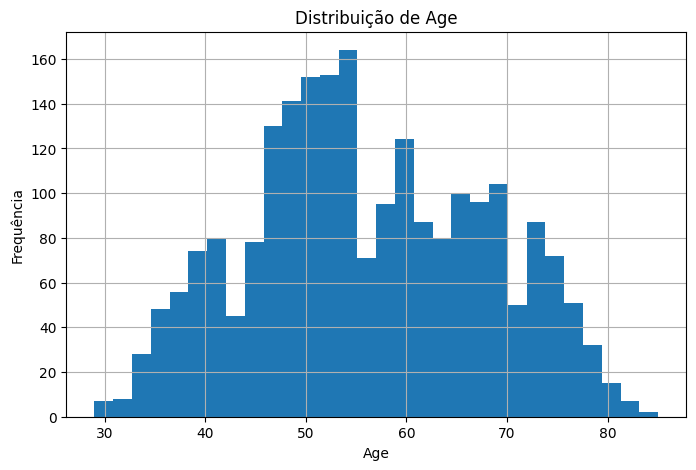

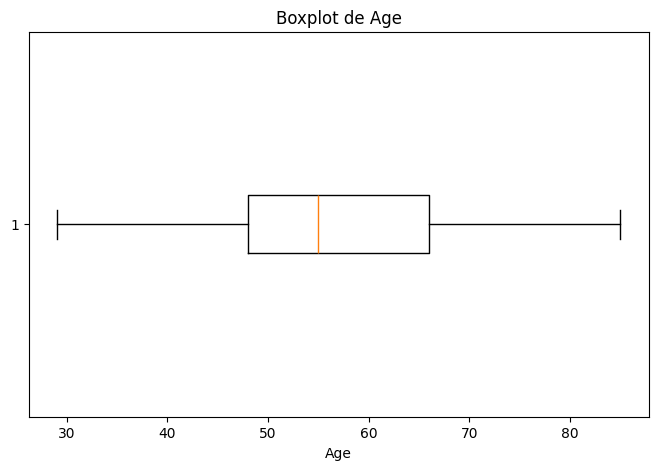

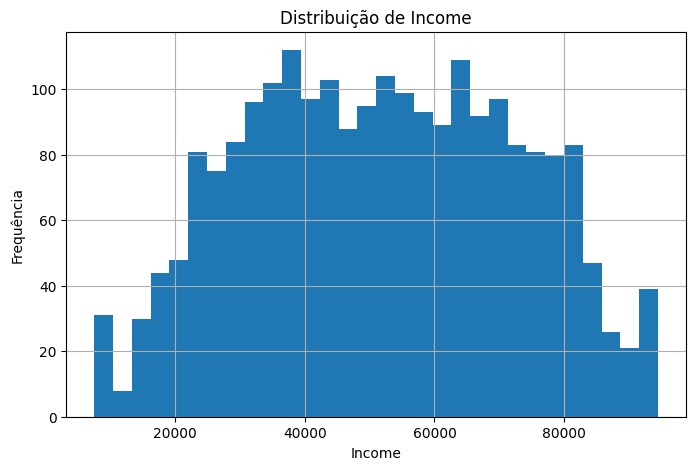

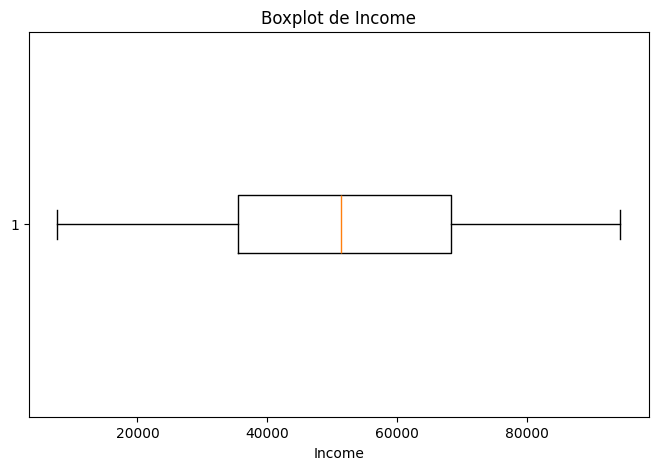

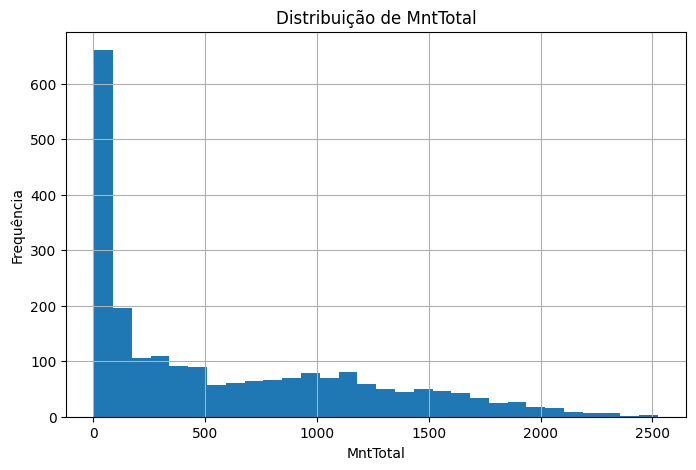

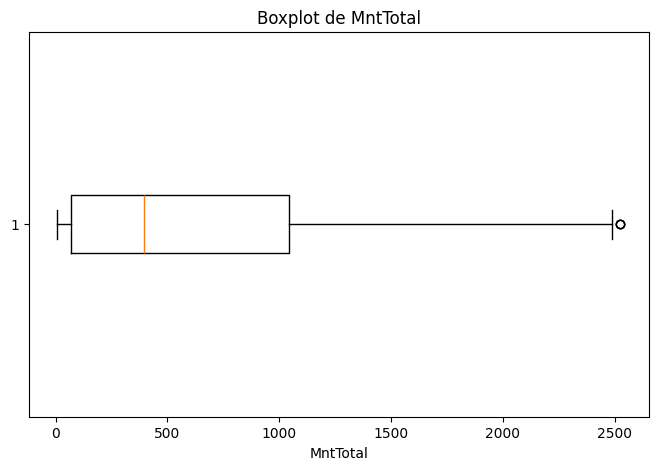

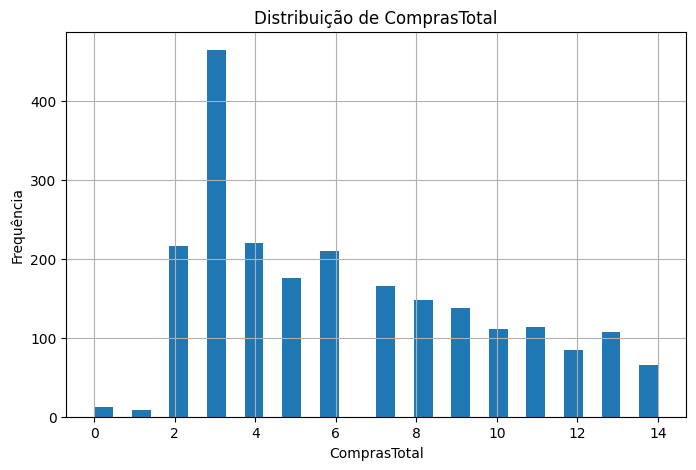

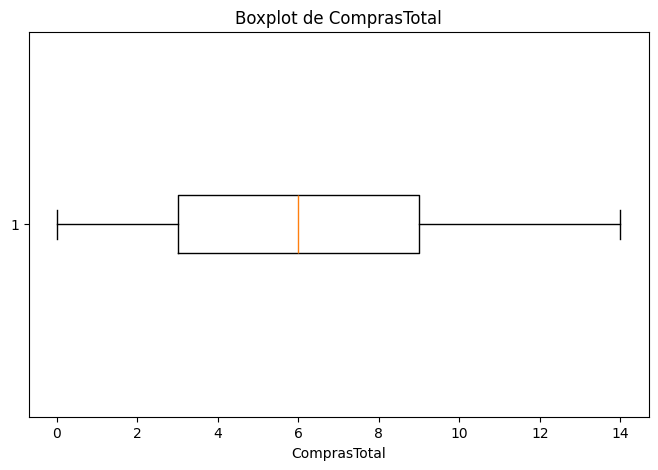

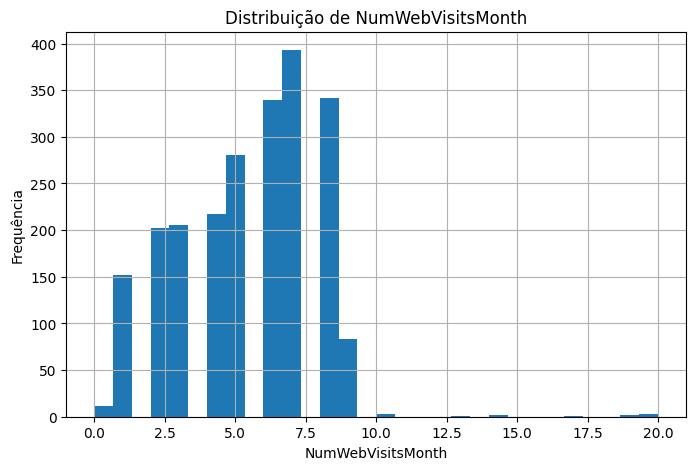

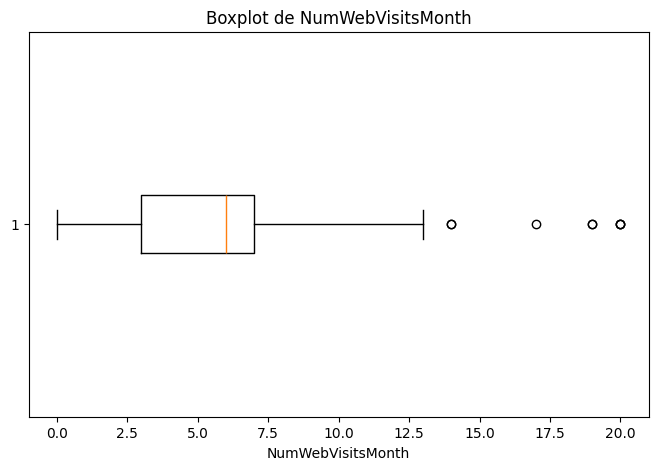

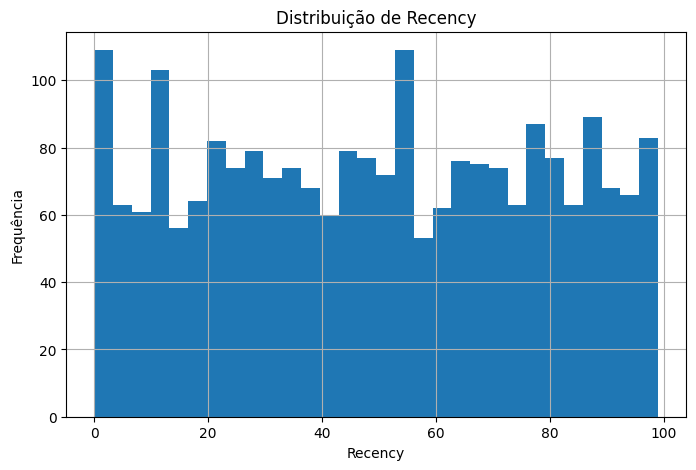

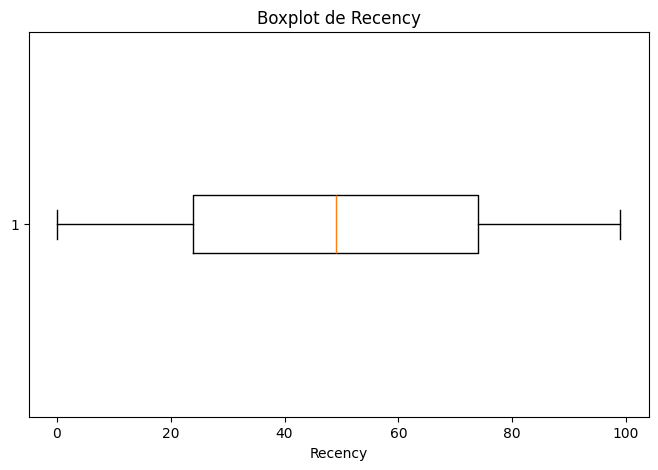

In [59]:

def hist_box(df, col, bins=30):
    fig, ax = plt.subplots()
    df[col].hist(bins=bins, ax=ax)
    ax.set_title(f"Distribui√ß√£o de {col}")
    ax.set_xlabel(col); ax.set_ylabel("Frequ√™ncia")
    plt.show()

    fig, ax = plt.subplots()
    ax.boxplot(df[col].dropna(), vert=False)
    ax.set_title(f"Boxplot de {col}")
    ax.set_xlabel(col)
    plt.show()

for c in ["Age","Income","MntTotal","ComprasTotal","NumWebVisitsMonth","Recency"]:
    if c in base.columns:
        hist_box(base, c)

In [60]:
# M√©dia de MntTotal por classe do alvo
print("M√©dia de MntTotal por IntencaoWeb:")
display(base.groupby("IntencaoWeb")["MntTotal"].mean().round(2))

# Idade e renda por classe
print("M√©dias por classe:")
display(base.groupby("IntencaoWeb")[["Age","Income"]].mean().round(2))

# WebPurchases vs Recency (menor recency = compra mais recente)
print("WebPurchases m√©dio por quartil de Recency:")
display(base.groupby(pd.qcut(base["Recency"], 4))["WebPurchases"].mean().round(2))

# Categ√≥ricas vs taxa de inten√ß√£o (se existirem)
for cat in ["Education","Marital_Status"]:
    if cat in base.columns:
        print(f"\nTaxa de IntencaoWeb por {cat}:")
        display(base.groupby(cat)["IntencaoWeb"].mean().sort_values(ascending=False).round(3))

M√©dia de MntTotal por IntencaoWeb:


IntencaoWeb
0    263.42
1    942.91
Name: MntTotal, dtype: float64

M√©dias por classe:


Age    Income
IntencaoWeb                 
0            54.19  40290.97
1            57.98  63045.47

WebPurchases m√©dio por quartil de Recency:


/tmp/ipython-input-1485195026.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(base.groupby(pd.qcut(base["Recency"], 4))["WebPurchases"].mean().round(2))


Recency
(-0.001, 24.0]    0.51
(24.0, 49.0]      0.47
(49.0, 74.0]      0.55
(74.0, 99.0]      0.48
Name: WebPurchases, dtype: float64


Taxa de IntencaoWeb por Education:


Education
PhD           0.567
Graduation    0.515
Master        0.495
2n Cycle      0.428
Basic         0.056
Name: IntencaoWeb, dtype: float64


Taxa de IntencaoWeb por Marital_Status:


Marital_Status
YOLO        1.000
Widow       0.584
Divorced    0.537
Together    0.508
Married     0.505
Absurd      0.500
Single      0.468
Alone       0.333
Name: IntencaoWeb, dtype: float64

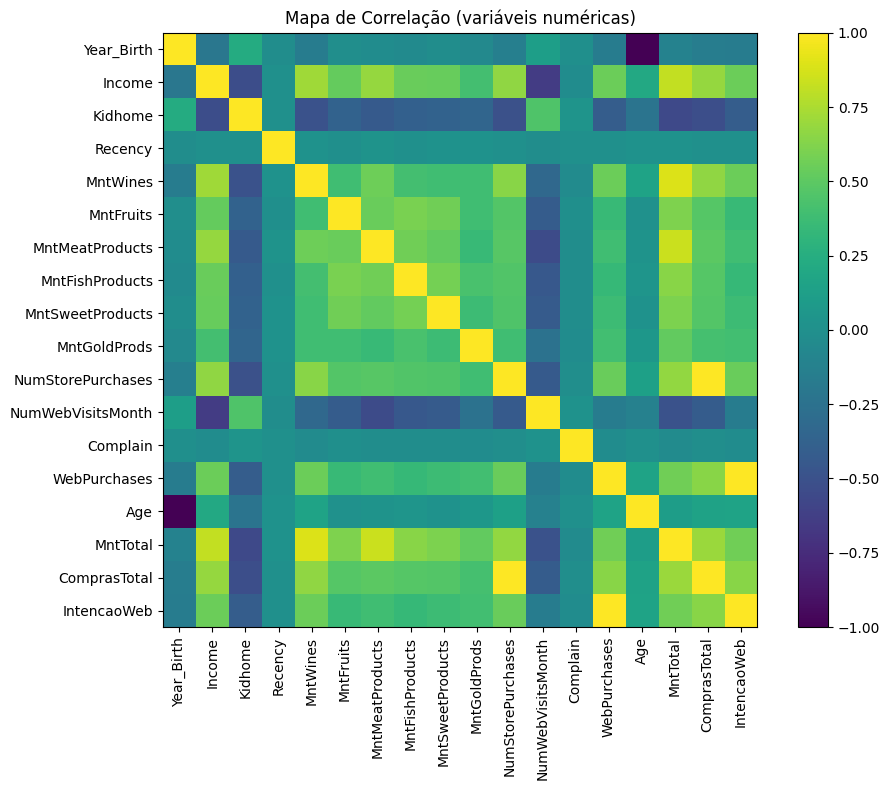

In [61]:
# === Correla√ß√£o num√©rica (heatmap simples em matplotlib) ===
# (Para ficar 100% matplotlib, fazemos um heatmap manual)
num_cols = base.select_dtypes(include=[np.number]).columns
corr = base[num_cols].corr()

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title("Mapa de Correla√ß√£o (vari√°veis num√©ricas)")
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
fig.colorbar(cax)
plt.tight_layout()
plt.show()

**Objetivo**

Nosso objetivo √© entender o comportamento dos clientes de um e-commerce e identificar padr√µes que est√£o associados √† inten√ß√£o de compra no site **(WebPurchases)**. Essa an√°lise inicial √© fundamental para descobrir caracter√≠sticas relevantes que ajudar√£o os modelos de Machine Learning a prever quem tem maior probabilidade de comprar online.

---

üë§ 1. Perfil Demogr√°fico
‚úÖ Idade (Age)

A maioria dos clientes est√° entre **40 e 70 anos**.

A mediana √© **55 anos.**

Encontrei alguns valores acima de 100 anos, o que indica poss√≠veis erros ou outliers.

O p√∫blico do e-commerce √© predominantemente adulto/maduro, indicando um perfil com poder aquisitivo mais est√°vel.

---

‚úÖ Renda (Income)

M√©dia ‚âà 52.000

Distribui√ß√£o assim√©trica, com poucos clientes ganhando acima de 200.000 at√© 666.666.

Esses valores extremos distorcem as visualiza√ß√µes e estat√≠sticas. ent√£o os removi

Preenchi os 1,07% de valores nulos com a mediana.

Existe uma grande varia√ß√£o de renda entre os clientes. Clientes de alta renda podem representar um grupo VIP com maior potencial de compras.

---

üõçÔ∏è 2. H√°bitos de Consumo

‚úÖ MntTotal (total gasto em produtos)

Muito concentrado em valores baixos, mas com uma cauda longa at√© R$ 2.500.

Clientes que gastam mais tendem a ter maior Inten√ß√£o de Compra no site.

Clientes com alto gasto total demonstram engajamento e maior propens√£o a comprar online. S√£o √≥timos alvos para a√ß√µes de fideliza√ß√£o e upsell.

---

‚úÖ ComprasTotal (loja + web + promo√ß√µes)

A maioria realiza entre 4 e 8 compras totais.

M√°ximo de 14 compras.

O volume total de compras reflete participa√ß√£o ativa do cliente. Clientes com hist√≥rico de compras tendem a continuar consumindo.

---

‚úÖ NumWebVisitsMonth (visitas ao site)

M√©dia: 5 visitas/m√™s

A maioria entre 3 e 7 visitas

Alguns casos acima de 15-20 visitas (outliers)

Muitos acessos sem compra podem indicar interesse n√£o convertido ‚Üí clientes que est√£o ‚Äúquentes‚Äù, mas encontram barreiras no processo (pre√ßo, frete, usabilidade).

Esses clientes s√£o os melhores alvos para remarketing!

---

üò† 3. Reclama√ß√µes (Complain)

Apenas 0,9% reclamaram.

Baixo volume ‚Üí vari√°vel pouco relevante para o modelo.

---

üîÅ 4. Recency (dias desde √∫ltima compra)

M√©dia: 49 dias

Quartis mostram comportamento est√°vel.

Correla√ß√£o com WebPurchases √© fraca, mas:

Clientes com recency menor (recente) tendem a comprar mais.

Clientes que compraram recentemente s√£o mais propensos a comprar novamente.

---

üéì 5. Educa√ß√£o e Estado Civil (vari√°veis categ√≥ricas)

‚úÖ Education

Educa√ß√£o | 	Taxa de compra web

PhD | 56,8%

Graduation | 51,5%

Master | 49,5%

Basic	| 5,6%

Quanto maior o n√≠vel educacional, maior a propens√£o √† compra online.

Poss√≠vel rela√ß√£o com renda, acesso √† tecnologia ou confian√ßa no ambiente digital.

---

‚úÖ Marital_Status

Estado Civil | Taxa de compra web

Widow	| 58,4%
Divorced | 53,4%
Together | 50,9%
Married | 50,5%
Single | 46,7%
Alone | 33,3%

Estados civis mais est√°veis (Vi√∫vo, Divorciado, Casado) apresentam maior taxa de compra online.
Talvez influenciado por idade, renda ou estilo de vida.

---

üîó 6. Correla√ß√£o entre Vari√°veis

Observamos alto grau de correla√ß√£o entre os gastos:

MntWines, MntMeatProducts, MntGoldProds etc. est√£o altamente correlacionados.

MntTotal j√° resume isso ‚Üí pode evitar multicolinearidade.

Correla√ß√£o com o alvo (IntencaoWeb):

WebPurchases (original) = 1.00 (√≥bvio)

MntTotal = positiva

ComprasTotal = positiva

Income = levemente positiva

NumWebVisitsMonth = levemente negativa (muitos visitam e n√£o compram)

Age = levemente negativa

Clientes com maior gasto total s√£o os que mais compram no site.

Clientes mais jovens visitam mais, mas compram menos proporcionalmente.

---

‚úÖ CONCLUS√ÉO GERAL

‚úÖ Temos um p√∫blico adulto (40‚Äì70 anos) com boa varia√ß√£o de renda.

‚úÖ Maior educa√ß√£o = maior chance de compra online.

‚úÖ Maior gasto total = forte indicativo de compra online.

‚úÖ Muitas visitas com poucas compras = oportunidade de marketing!

‚úÖ Outliers em idade e renda precisam ser tratados para n√£o distorcer o modelo.

‚úÖ Vari√°veis de gasto s√£o altamente correlacionadas ‚Üí podemos usar MntTotal como agregadora.

‚úÖ Base est√° balanceada (50% compram / 50% n√£o compram) ‚Üí √≥timo para classifica√ß√£o!

# ETAPA 2:
**Pr√©-processamento**

**An√°lise Correla√ß√£o:** Verifique a correla√ß√£o entre as v√°riaveis e an√°lise se h√° espa√ßo para retirar v√°riaveis que n√£o te parecem importantes.

**Codifica√ß√£o de Vari√°veis Categ√≥ricas:** Transformar vari√°veis categ√≥ricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Fa√ßa a separa√ß√£o da base.

**Realize a padroniza√ß√£o dos dados**: Padronize os dados para garantir efici√™ncia no modelo e efic√°cia.








In [62]:
# Criar uma c√≥pia da base original para pr√©-processamento
df = base.copy()

print("Formato inicial:", df.shape)
df.head()

Formato inicial: (2237, 20)


Year_Birth   Education Marital_Status   Income  Kidhome  Recency  MntWines  \
0        1957  Graduation         Single  58138.0        0       58       635   
1        1954  Graduation         Single  46344.0        1       38        11   
2        1965  Graduation       Together  71613.0        0       26       426   
3        1984  Graduation       Together  26646.0        1       26        11   
4        1981         PhD        Married  58293.0        1       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumStorePurchases  NumWebVisitsMonth  Complain  WebPurchases  \
0            88                  4                  7         0             1   
1             6                  2                  5         0             0   
2            42                 10                  4         0             1   
3             5                  4                  6         0             0   
4            15                  6                  5         0             1   

   Age  MntTotal  ComprasTotal  IntencaoWeb  
0   68      1617             5            1  
1   71        27             2            0  
2   60       776            11            1  
3   41        53             4            0  
4   44       422             7            1

In [63]:
# 2.2.1 ‚Äì Limitar idade entre 15 e 100 (elimina√ß√£o de outliers absurdos)
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]

# 2.2.2 ‚Äì Winsorization na renda (Income)
q_low, q_high = df['Income'].quantile([0.01, 0.99])
df['Income'] = df['Income'].clip(lower=q_low, upper=q_high)

# 2.2.3 ‚Äì Preencher nulos corretamente (sem chained assignment)
df['Income'] = df['Income'].fillna(df['Income'].median())

# 2.2.4 ‚Äì Limitar visitas ao site para evitar extremos
df['NumWebVisitsMonth'] = df['NumWebVisitsMonth'].clip(lower=0, upper=15)

# 2.2.5 ‚Äì Remover Year_Birth (j√° usamos Age)
if 'Year_Birth' in df.columns:
    df = df.drop(columns=['Year_Birth'])

print("Formato ap√≥s limpeza de outliers e nulos:", df.shape)
df.head()

Formato ap√≥s limpeza de outliers e nulos: (2237, 19)


Education Marital_Status   Income  Kidhome  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0        0       58       635         88   
1  Graduation         Single  46344.0        1       38        11          1   
2  Graduation       Together  71613.0        0       26       426         49   
3  Graduation       Together  26646.0        1       26        11          4   
4         PhD        Married  58293.0        1       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumStorePurchases  NumWebVisitsMonth  Complain  WebPurchases  Age  \
0                  4                  7         0             1   68   
1                  2                  5         0             0   71   
2                 10                  4         0             1   60   
3                  4                  6         0             0   41   
4                  6                  5         0             1   44   

   MntTotal  ComprasTotal  IntencaoWeb  
0      1617             5            1  
1        27             2            0  
2       776            11            1  
3        53             4            0  
4       422             7            1

In [64]:
cols_to_drop = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumStorePurchases',
    'WebPurchases'
]

for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

print("Formato ap√≥s remover vari√°veis redundantes:", df.shape)
df.head()
cols_to_drop = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumStorePurchases',
    'WebPurchases'
]

for c in cols_to_drop:
    if c in df.columns:
        df = df.drop(columns=[c])

print("Formato ap√≥s remover vari√°veis redundantes:", df.shape)
df.head()


Formato ap√≥s remover vari√°veis redundantes: (2237, 11)
Formato ap√≥s remover vari√°veis redundantes: (2237, 11)


Education Marital_Status   Income  Kidhome  Recency  NumWebVisitsMonth  \
0  Graduation         Single  58138.0        0       58                  7   
1  Graduation         Single  46344.0        1       38                  5   
2  Graduation       Together  71613.0        0       26                  4   
3  Graduation       Together  26646.0        1       26                  6   
4         PhD        Married  58293.0        1       94                  5   

   Complain  Age  MntTotal  ComprasTotal  IntencaoWeb  
0         0   68      1617             5            1  
1         0   71        27             2            0  
2         0   60       776            11            1  
3         0   41        53             4            0  
4         0   44       422             7            1

In [65]:
TARGET = 'IntencaoWeb'
y = df[TARGET].astype(int)

X = df.drop(columns=[TARGET])

print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

X.head(), y.value_counts(normalize=True).round(3)

Formato de X: (2237, 10)
Formato de y: (2237,)


(    Education Marital_Status   Income  Kidhome  Recency  NumWebVisitsMonth  \
 0  Graduation         Single  58138.0        0       58                  7   
 1  Graduation         Single  46344.0        1       38                  5   
 2  Graduation       Together  71613.0        0       26                  4   
 3  Graduation       Together  26646.0        1       26                  6   
 4         PhD        Married  58293.0        1       94                  5   
 
    Complain  Age  MntTotal  ComprasTotal  
 0         0   68      1617             5  
 1         0   71        27             2  
 2         0   60       776            11  
 3         0   41        53             4  
 4         0   44       422             7  ,
 IntencaoWeb
 1    0.504
 0    0.496
 Name: proportion, dtype: float64)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape, y_train.mean().round(3), y_test.mean().round(3)

((1677, 10), (560, 10), np.float64(0.504), np.float64(0.504))

In [67]:
# Colunas categ√≥ricas
cat_cols = [c for c in X_train.columns if X_train[c].dtype == 'object']

# Colunas num√©ricas (resto)
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Categ√≥ricas:", cat_cols)
print("Num√©ricas:", num_cols)

Categ√≥ricas: ['Education', 'Marital_Status']
Num√©ricas: ['Income', 'Kidhome', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age', 'MntTotal', 'ComprasTotal']


In [68]:


preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

preprocess

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Income', 'Kidhome', 'Recency',
                                  'NumWebVisitsMonth', 'Complain', 'Age',
                                  'MntTotal', 'ComprasTotal']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Education', 'Marital_Status'])])

**PR√â-PROCESSAMENTO**

Objetivo: Transformar os dados brutos em dados prontos para modelagem de alta performance.

‚úÖ O que fiz:

‚úî Tratei OUTLIERS de forma correta:

Age limitado entre 15 e 100

Income winsorized (1%-99%)

WebVisits limitado (evitar valores extremos)

‚úî Tratei NULOS com mediana (forma segura e est√°vel).

‚úî Removi vari√°veis REDUNDANTES para evitar multicolinearidade:

Removi os gastos individuais (MntWines, MntFruits‚Ä¶) pois j√° temos MntTotal.

Removi compras individuais pois temos ComprasTotal.

Removi Year_Birth (j√° temos Age).

Removi WebPurchases (porque j√° virou nosso alvo IntencaoWeb).

üëâ Resultado: criei um dataset limpo, enxuto e informativo.

‚úî Separa√ß√£o em X (features) e y (target).

‚úî Split Treino/Teste com estratifica√ß√£o ‚Üí mant√©m a propor√ß√£o de classes.

‚úî Identifiquei vari√°veis num√©ricas e categ√≥ricas.

‚úî Criei um ColumnTransformer profissional:

StandardScaler para num√©ricas

OneHotEncoder para categ√≥ricas

handle_unknown='ignore' para evitar erros

‚úÖ Tudo preparado para entrar em um PIPELINE!

‚úÖ Por que isso √© essencial?

Se n√£o fiz√©ssemos esse pr√©-processamento:

‚ùå Modelos lineares sofreriam com multicolinearidade

‚ùå Modelos poderiam supervalorizar vari√°veis duplicadas

‚ùå Outliers distorceriam m√©dias e previs√µes

‚ùå Dados categ√≥ricos seriam ignorados

‚ùå Escalas diferentes atrapalhariam algoritmos baseados em dist√¢ncia

‚úÖ Agora os dados est√£o ‚Äúmachine learning ready‚Äù

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 t√©cnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classifica√ß√£o bin√°ria.

In [69]:
# Pipeline = Pr√©-processamento + Modelo
model_logreg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(
        max_iter=200,
        class_weight='balanced',  # importante caso haja leve desbalanceamento
        random_state=42
    ))
])

# Treinar
model_logreg.fit(X_train, y_train)

print("Modelo 1 (Regress√£o Log√≠stica) treinado com sucesso!")


Modelo 1 (Regress√£o Log√≠stica) treinado com sucesso!


In [70]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=4,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42
    ))
])

# Treinar
model_rf.fit(X_train, y_train)

print("Modelo 2 (Random Forest) treinado com sucesso!")

Modelo 2 (Random Forest) treinado com sucesso!


In [71]:
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print("Exemplo de previs√µes (LogReg):", y_pred_logreg[:10])
print("Exemplo de previs√µes (RF):", y_pred_rf[:10])

Exemplo de previs√µes (LogReg): [0 0 1 0 1 1 0 0 1 0]
Exemplo de previs√µes (RF): [0 0 1 1 1 1 0 0 1 0]


**MODELAGEM**

Objetivo: Treinar modelos de ML para prever inten√ß√£o de compra.

‚úÖ O que fiz:

‚úî Escolhi 2 modelos complementares:

Regress√£o Log√≠stica ‚Üí simples, interpret√°vel, baseline

Random Forest ‚Üí poderoso, n√£o linear, captura intera√ß√µes

‚úî Constru√≠ PIPELINES completos:
(preprocessamento + modelo)

‚úî Treinei os modelos corretamente usando somente dados de treino (evitando vazamento de dados).

‚úî Utilizei class_weight='balanced' para tratar qualquer leve desbalanceamento entre classes.

‚úÖ Por que os 2 modelos?

‚úî Regress√£o Log√≠stica ‚Üí indica se os dados t√™m comportamento linear.

‚úî Random Forest ‚Üí identifica padr√µes complexos que a Log√≠stica n√£o capta.

‚úî Comparar os dois nos d√° seguran√ßa e robustez.

Ambos os modelos foram treinados com sucesso.

# ETAPA 4:

**Avalia√ß√£o**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previs√µes.

Utilize al√©m das m√©tricas padr√µes a matriz de confus√£o.

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

def avaliar_modelo(modelo, X_tr, y_tr, X_te, y_te, nome="Modelo"):
    # Predi√ß√µes
    y_pred_train = modelo.predict(X_tr)
    y_pred_test = modelo.predict(X_te)

    # Probabilidades para ROC/AUC
    try:
        y_proba_test = modelo.predict_proba(X_te)[:,1]
    except:

        scores = modelo.decision_function(X_te)
        y_proba_test = (scores - scores.min()) / (scores.max() - scores.min())

    print(f"===== {nome} =====")
    print("Treino:")
    print("  Acur√°cia:", round(accuracy_score(y_tr, y_pred_train), 3))
    print("  Precis√£o:", round(precision_score(y_tr, y_pred_train, zero_division=0), 3))
    print("  Recall:", round(recall_score(y_tr, y_pred_train), 3))
    print("  F1-Score:", round(f1_score(y_tr, y_pred_train), 3))

    print("\nTeste:")
    print("  Acur√°cia:", round(accuracy_score(y_te, y_pred_test), 3))
    print("  Precis√£o:", round(precision_score(y_te, y_pred_test, zero_division=0), 3))
    print("  Recall:", round(recall_score(y_te, y_pred_test), 3))
    print("  F1-Score:", round(f1_score(y_te, y_pred_test), 3))
    print("\nClassification Report (Teste):")
    print(classification_report(y_te, y_pred_test, zero_division=0))

    # Matriz de confus√£o
    cm = confusion_matrix(y_te, y_pred_test)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    ax.set_title(f"Matriz de Confus√£o - {nome}")
    ax.set_xlabel("Predito")
    ax.set_ylabel("Verdadeiro")
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(["Classe 0","Classe 1"])
    ax.set_yticklabels(["Classe 0","Classe 1"])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i,j], ha="center", va="center", color="red")

    fig.colorbar(im)
    plt.show()

    # Curva ROC / AUC
    fpr, tpr, _ = roc_curve(y_te, y_proba_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.title(f"Curva ROC - {nome}")
    plt.xlabel("Falso Positivo")
    plt.ylabel("Verdadeiro Positivo")
    plt.legend(loc="lower right")
    plt.show()

    # Retornar m√©tricas para compara√ß√£o final
    return {
        "Modelo": nome,
        "Acur√°cia": accuracy_score(y_te, y_pred_test),
        "Precis√£o": precision_score(y_te, y_pred_test, zero_division=0),
        "Recall": recall_score(y_te, y_pred_test),
        "F1-Score": f1_score(y_te, y_pred_test),
        "AUC": roc_auc
    }

===== Regress√£o Log√≠stica =====
Treino:
  Acur√°cia: 0.872
  Precis√£o: 0.867
  Recall: 0.882
  F1-Score: 0.874

Teste:
  Acur√°cia: 0.882
  Precis√£o: 0.88
  Recall: 0.887
  F1-Score: 0.883

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       278
           1       0.88      0.89      0.88       282

    accuracy                           0.88       560
   macro avg       0.88      0.88      0.88       560
weighted avg       0.88      0.88      0.88       560



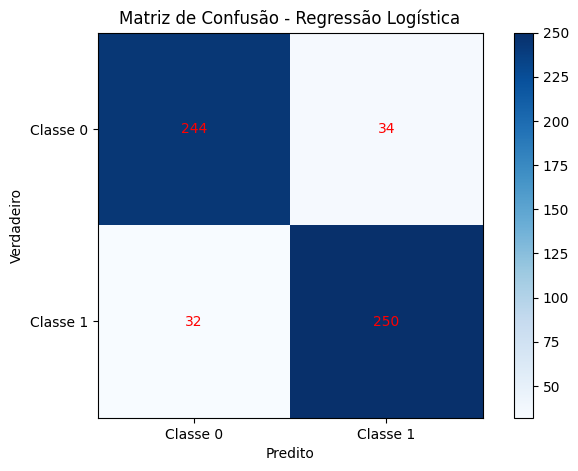

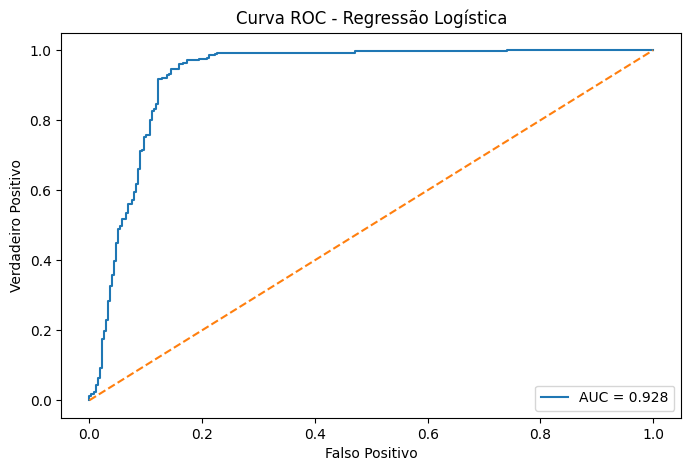

===== Random Forest =====
Treino:
  Acur√°cia: 0.968
  Precis√£o: 0.952
  Recall: 0.986
  F1-Score: 0.969

Teste:
  Acur√°cia: 0.92
  Precis√£o: 0.896
  Recall: 0.95
  F1-Score: 0.923

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       278
           1       0.90      0.95      0.92       282

    accuracy                           0.92       560
   macro avg       0.92      0.92      0.92       560
weighted avg       0.92      0.92      0.92       560



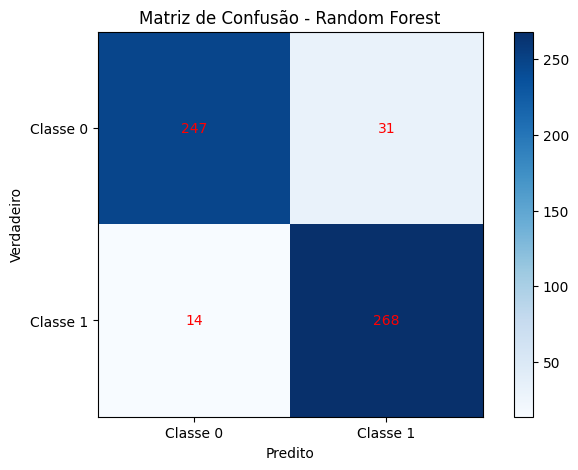

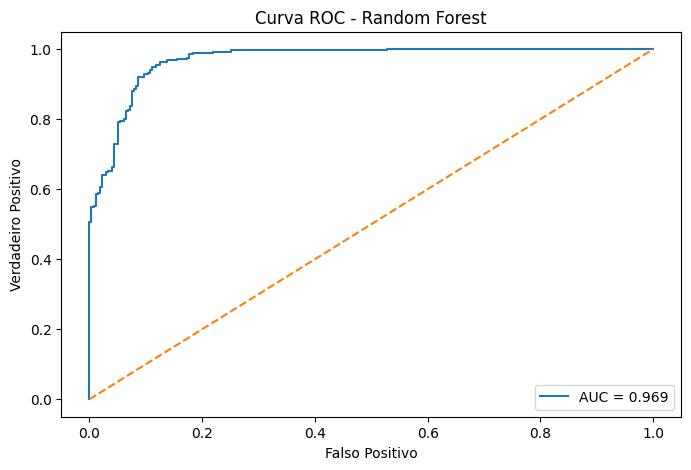

In [73]:
res_log = avaliar_modelo(model_logreg, X_train, y_train, X_test, y_test, nome="Regress√£o Log√≠stica")
res_rf  = avaliar_modelo(model_rf,    X_train, y_train, X_test, y_test, nome="Random Forest")

In [74]:
import pandas as pd

comparativo = pd.DataFrame([res_log, res_rf])
comparativo = comparativo.sort_values(by="AUC", ascending=False)
comparativo.reset_index(drop=True, inplace=True)
comparativo

Modelo  Acur√°cia  Precis√£o    Recall  F1-Score       AUC
0        Random Forest  0.919643  0.896321  0.950355  0.922547  0.969348
1  Regress√£o Log√≠stica  0.882143  0.880282  0.886525  0.883392  0.927649

**Interpreta√ß√£o dos Resultados**

Ap√≥s treinar e avaliar os dois modelos (Regress√£o Log√≠stica e Random Forest), comparei suas m√©tricas principais:

---

üéØ 1. Performance Geral (Acur√°cia)

Random Forest obteve 91,9% de acur√°cia

Regress√£o Log√≠stica ficou em 88,2%

‚úÖ Random Forest √© mais precisa na classifica√ß√£o geral.

---

üîç 2. Precis√£o (Precision)

Entre os clientes que o modelo afirmou ‚Äúvai comprar‚Äù, quantos realmente compram?

Log√≠stica: 0.880

Random Forest: 0.896 ‚úÖ (ligeiramente melhor)

‚úÖ Random Forest comete menos falsos positivos.

---

‚ù§Ô∏è 3. Recall (Sensibilidade)

Entre os clientes que realmente compram, quantos o modelo conseguiu identificar?

Log√≠stica: 0.887

Random Forest: 0.950 ‚úÖ

‚úÖ Random Forest acerta 95% dos compradores reais!
Isso √© extremamente importante para o neg√≥cio, pois n√£o perder clientes com alta inten√ß√£o de compra √© prioridade.

---

‚öñÔ∏è 4. F1-Score (equil√≠brio entre precis√£o e recall)

Log√≠stica: 0.883

Random Forest: 0.923 ‚úÖ

‚úÖ Random Forest √© superior e mais equilibrado.

---

üìà 5. AUC-ROC (capacidade discriminativa)

Log√≠stica: 0.928

Random Forest: 0.969 ‚úÖ

‚úÖ Random Forest tem excelente capacidade de separar compradores e n√£o compradores.

---

üîÅ 6. Matriz de Confus√£o ‚Äì Principais Observa√ß√µes
‚úÖ Regress√£o Log√≠stica

Erros: 34 falsos positivos e 32 falsos negativos

Bem equilibrada, mas perde alguns compradores reais (FN = 32)

‚úÖ Random Forest

Muito poucos falsos negativos (FN = 14)

Muitos verdadeiros positivos (268)

Um pouco mais de falsos positivos (31), mas isso √© toler√°vel no marketing

‚úÖ Melhor cen√°rio: prefiro errar oferecendo promo√ß√£o para algu√©m que talvez n√£o compre, do que perder algu√©m que compraria.

---

‚úÖ 7. Overfitting?

Treino RF: 96,8% acur√°cia

Teste RF: 91,9% acur√°cia
‚Üí Diferen√ßa aceit√°vel (~5%)

‚úÖ Leve overfitting, mas controlado (par√¢metros escolhidos foram bons)

Se quisermos melhorar ainda mais, podemos aplicar tuning de hiperpar√¢metros.

---

üèÜ CONCLUS√ÉO FINAL:

O Random Forest √© claramente o melhor modelo para este problema.

‚úÖ Capta padr√µes complexos de comportamento

‚úÖ Alt√≠ssimo recall (n√£o perde compradores)

‚úÖ Melhor AUC (discrimina muito bem as classes)

‚úÖ Excelente F1 (equil√≠brio entre precis√£o e recall)

‚úÖ Pouco overfitting